In [ ]:

from graph_converter import graph_utilitys
import csv
import os
import numpy as np
import matplotlib.pyplot as plt


base_dir = os.path.abspath('')+'/experiment_data/SI'
csv_path_list = {0:base_dir+'/position_data/all_data.csv'}
datasets, obj_name_set = graph_util.csv2graphDataset(csv_path_list, include_names=True)
save_dir = base_dir +'/images/'


with open(base_dir+'/position_data/test_probability.csv') as f:
    reader = csv.reader(f)
    probabilitys = [[float(p) for p in row] for row in reader]
print(np.shape(probabilitys))
for i, (graph, names) in enumerate(zip(datasets,obj_name_set)):
    save_dir = base_dir + '/result/'+str(np.argmax(probabilitys[i]))
    plt.close()
    plt.tight_layout()
    height = np.round(probabilitys[i], decimals=5)*100
    left = ['1', '2', '3', '4']
    plt.bar(left, height)
    plt.ylim(0, 100)
    plt.title(str(np.round(probabilitys[i], decimals=5)*100))
    plt.savefig(save_dir+'/'+str(i)+'_probability.png', facecolor="azure")
    plt.close()

    visualize_graph(graph, node_labels=names, save_graph_name=save_dir+'/'+str(i)+'_graph.png', show_graph=False)
    plt.close()


In [ ]:
import pandas as pd
import numpy as np
import csv
import os
from graph_converter import graph_utilitys
from classificator_gcn import classificator
import fasttext

cf = classificator(model='SI_gcn-w300-30cm.pt')
model_path =  os.path.abspath('') +'/w2v_model/cc.en.300.bin'
ft = fasttext.load_model(model_path)

# file_path = os.path.abspath('')+'/experiment_data/SI/position_data/test.csv'
# with open(file_path) as f:
#     reader = csv.reader(f)
#     all_position_data = [[float(p) for p in row] for row in reader]


base_dir = os.path.abspath('')+'/experiment_data/SI'
csv_path_list = {0:base_dir+'/position_data/work.csv',
                 1:base_dir+'/position_data/meal_and_working_tools.csv',
                 2:base_dir+'/position_data/meal_while_working.csv',
                 3:base_dir+'/position_data/meal.csv'}

obj_name_change_patterns = [{'sandwich':'pancake'},
                            {'sandwich':'toast'},
                            # {'sandwich':'cereal'},
                            # {'hot dog':'pancake'},
                            # {'hot dog':'toast'},
                            # {'hot dog':'cereal'},
                            # {'orange':'apple'},
                            # {'orange':'banana'},
                            # {'orange':'grape'},
                            # {'banana':'apple'},
                            # {'banana':'orange'},
                            # {'banana':'grape'},
                            ]


df = pd.DataFrame()

related_graph_ids = []
for i, pattern in enumerate(obj_name_change_patterns):
    # save_dir = base_dir+'/pattern_'+str(i)
    # os.mkdir(save_dir)
    # インスタンスを作り直す（ID_2_OBJECT_NAMEをリセット）
    graph_util = graph_utilitys(fasttext_model=ft)
    # if i>0: # 認識物体の名前を変更
    graph_util.changeID_2_OBJECT_NAME(pattern)
    print(graph_util.ID_2_OBJECT_NAME)
    # データセットを作成
    datasets, obj_names_sets = graph_util.csv2graphDataset(csv_path_list, include_names=True)
    print(len(datasets))

    p_results = []
    related_graph_count = 0 # 物体名の変更が影響があるグラフの数
    crrect_num = 0
    is_related_graph_list = []
    for graph, obj_names in zip(datasets, obj_names_sets):
        # print('-----------')
        is_related_graph = False
        # 物体名の変更が影響があるグラフの数
        # print(obj_names)
        # print(pattern.keys())
        for old_name in pattern.keys():
            print(old_name)
            print(obj_names)
            if old_name in obj_names:
                # print(old_name in obj_names)
                related_graph_count += 1
                is_related_graph = True
                break
        is_related_graph_list.append(is_related_graph)
        # 分類
        result = np.argmax(cf.classificate(graph))
        if is_related_graph and (result == int(graph.y)):
            crrect_num += 1
        p_results.append(result)
        # break
    print('正解率：' , crrect_num/related_graph_count)
    df['pattern_'+str(i)] = p_results
    df['pattern_'+str(i)+'is_related'] = is_related_graph_list
df





In [ ]:
os.path.abspath('')
df[1000:1100]


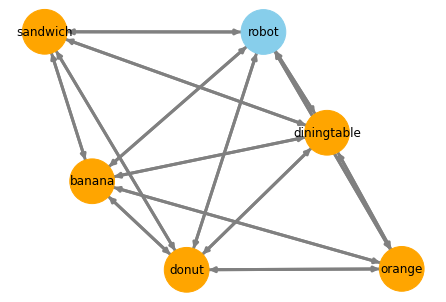

In [1]:

from graph_converter import graph_utilitys
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import fasttext

model_path =  os.path.abspath('') +'/w2v_model/cc.en.300.bin'
ft = fasttext.load_model(model_path)
graph_util = graph_utilitys(fasttext_model=ft)

base_dir = os.path.abspath('')+'/experiment_data/SI'
csv_path_list = {0:base_dir+'/position_data/work.csv',
                 1:base_dir+'/position_data/meal_and_working_tools.csv',
                 2:base_dir+'/position_data/meal_while_working.csv',
                 3:base_dir+'/position_data/meal.csv'}
for label, file in csv_path_list.items():
    with open(file) as f:
        csv_file = csv.reader(f)
        positions_data = [[float(v) for v in row] for row in csv_file]
        
    save_dir = file.replace('.csv', '')
    os.mkdir(save_dir)
    
    for i, position_data in enumerate(positions_data):
        plt.close()
        graph, obj_names = graph_util.convertData2graph(position_data, label=label, include_names=True)
        graph_util.visualize_graph(graph, node_labels=obj_names, save_graph_name=save_dir+'/'+str(i)+'.png', show_graph=False)
        # 分類
        # result = np.argmax(cf.classificate(graph))